In [1]:
from datar import f
from datar.dplyr import mutate, filter, if_else
from datar.tibble import tibble
# or
# from datar.all import f, mutate, filter, if_else, tibble

[2021-07-16 15:28:15][datar][WARNING] Builtin name "filter" has been overriden by datar.


In [2]:
df = tibble(
    x=range(4),
    y=['zero', 'one', 'two', 'three']
)
print(df >> mutate(z=f.x))

        x        y       z
  <int64> <object> <int64>
0       0     zero       0
1       1      one       1
2       2      two       2
3       3    three       3


In [3]:
print(df >> mutate(z=if_else(f.x>1, 1, 0)))

        x        y       z
  <int64> <object> <int64>
0       0     zero       0
1       1      one       0
2       2      two       1
3       3    three       1


In [4]:
print(df >> filter(f.x>1))

        x        y
  <int64> <object>
0       2      two
1       3    three


In [5]:
print(df >> mutate(z=if_else(f.x>1, 1, 0)) >> filter(f.z==1))

        x        y       z
  <int64> <object> <int64>
0       2      two       1
1       3    three       1


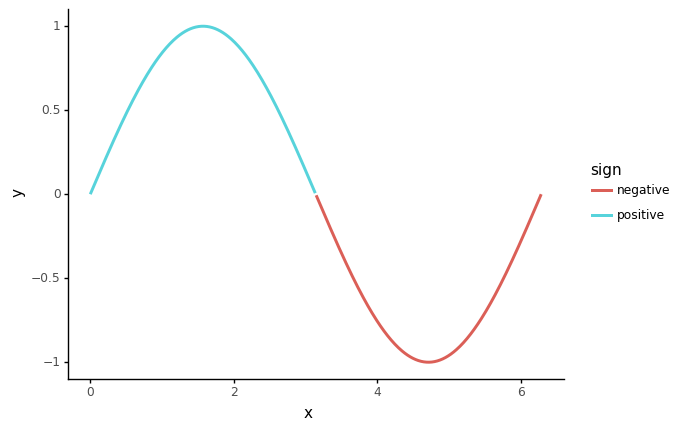

<ggplot: (8729900284493)>

In [6]:
# works with plotnine
import numpy
from datar.base import sin, pi
from plotnine import ggplot, aes, geom_line, theme_classic

df = tibble(x=numpy.linspace(0, 2*pi, 500))
(df >> 
  mutate(y=sin(f.x), sign=if_else(f.y>=0, "positive", "negative")) >> 
  ggplot(aes(x='x', y='y')) + 
  theme_classic() + 
  geom_line(aes(color='sign'), size=1.2))


<AxesSubplot:xlabel='Sepal_Length', ylabel='Density'>

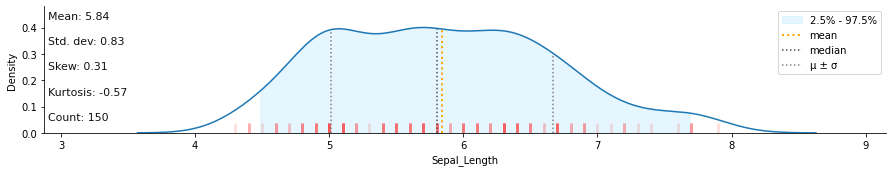

In [7]:
# very easy to integrate with other libraries
# for example: klib
import klib
from pipda import register_verb
from datar.datasets import iris
from datar.dplyr import pull

dist_plot = register_verb(func=klib.dist_plot)
iris >> pull(f.Sepal_Length) >> dist_plot()